In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
wine.head(2)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0


In [4]:
wine.shape

(6497, 4)

In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()

In [6]:
target = wine['class'].to_numpy()

In [7]:
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size=0.2, random_state = 42)

In [8]:
train_input

array([[10.5 ,  7.7 ,  3.19],
       [12.4 ,  2.1 ,  3.26],
       [11.8 ,  2.1 ,  3.41],
       ...,
       [ 9.5 ,  5.6 ,  3.24],
       [ 9.5 ,  8.  ,  3.18],
       [ 9.5 ,  2.7 ,  3.51]])

In [9]:
train_target

array([1., 0., 0., ..., 1., 1., 0.])

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [11]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 42)

In [12]:
scores = cross_validate(rf, train_input, train_target, 
                        return_train_score=True, n_jobs = -1)

In [13]:
scores

{'fit_time': array([0.3688159 , 0.5183816 , 0.38443685, 0.61040783, 0.36881566]),
 'score_time': array([0.07810688, 0.04625678, 0.06248522, 0.03124142, 0.06248522]),
 'test_score': array([0.88461538, 0.88942308, 0.90279115, 0.88931665, 0.88642926]),
 'train_score': array([0.9971133 , 0.99663219, 0.9978355 , 0.9973545 , 0.9978355 ])}

In [14]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


In [15]:
rf.fit(train_input, train_target)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


In [17]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

In [18]:
rf.fit(train_input, train_target)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [19]:
print(rf.oob_score_)

0.8934000384837406


In [20]:
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [23]:
scores = cross_validate(et, train_input, train_target, 
                        return_train_score=True, n_jobs = -1)

In [24]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


In [25]:
et.fit(train_input, train_target)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [26]:
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
gb = GradientBoostingClassifier(random_state = 42)

In [30]:
scores = cross_validate(gb, train_input, train_target, 
                        return_train_score=True, n_jobs = -1)

In [31]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [33]:
gb = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.2, random_state = 42)

In [34]:
scores = cross_validate(gb, train_input, train_target, 
                        return_train_score=True, n_jobs = -1)

In [35]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [36]:
gb.fit(train_input, train_target)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=500, random_state=42)

In [37]:
print(gb.feature_importances_)

[0.15872278 0.68011572 0.16116151]


In [38]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

C:\Users\ds\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [39]:
hgb = HistGradientBoostingClassifier(random_state=42)

In [40]:
scores = cross_validate(hgb, train_input, train_target, 
                        return_train_score=True, n_jobs = -1)

In [41]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [42]:
from sklearn.inspection import permutation_importance

In [43]:
hgb.fit(train_input, train_target)

HistGradientBoostingClassifier(random_state=42)

In [50]:
result = permutation_importance(hgb, test_input, test_target, 
n_repeats = 10, random_state=42, n_jobs=-1)

In [51]:
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


In [52]:
hgb.score(test_input, test_target)

0.8723076923076923

## 랜덤포레스트로 유방암 진단하기 분석

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

In [75]:
def Random_Forest_Classifier(dataset, max_depth, test_size):
    
    """ 훈련데이터 검증 데이터 분리 """
    X_train, X_test, Y_train, Y_test = train_test_split(
    dataset.data, dataset.target, stratify=dataset.target, test_size=test_size, random_state=42)
    
    """ 랜덤포레스트 모델 생성 및 학습 """
    rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=0)
    rf.fit(X_train, Y_train)
    
    """ 훈련데이터와 데스트데이터에 대한 정확도 확인 """
    train_accuracy = rf.score(X_train, Y_train)
    test_accuracy = rf.score(X_test, Y_test)
    print("훈련데이터(train_accuracy) : {:.3f}".format(train_accuracy))
    print("테스트데이터(test_accuracy) : {:.3f}".format(test_accuracy))
    
    """ 특성 중요도 확인 feature_importances_ """
    
    features = dataset.feature_names
    importances = rf.feature_importances_
    importances_dict = {name:value for name, value in zip(features, importances)}
    print("Feature Importances : \n", importances_dict)
    
    plt.figure(figsize=(20,10))
    n_features = dataset.data.shape[1]
    plt.barh(np.arange(n_features), importances, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.savefig('rf_fig.png',
               facecolor='#eeeeee',
               edgecolor='black',
               format='png',
               dpi=100)
    plt.show()

In [64]:
cancer = load_breast_cancer()

In [65]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [60]:
type(cancer)

sklearn.utils._bunch.Bunch

In [61]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

훈련데이터(train_accuracy) : 0.993
테스트데이터(test_accuracy) : 0.958
Feature Importances : 
 {'mean radius': 0.032744858253493624, 'mean texture': 0.017610771389645445, 'mean perimeter': 0.0817580554338357, 'mean area': 0.04331554514602314, 'mean smoothness': 0.006856577503426874, 'mean compactness': 0.0031628833959618462, 'mean concavity': 0.061542360529020505, 'mean concave points': 0.10938297401350967, 'mean symmetry': 0.0037134357985012328, 'mean fractal dimension': 0.0023519843911046553, 'radius error': 0.018182195493916604, 'texture error': 0.003985546130191511, 'perimeter error': 0.014687696646467132, 'area error': 0.026631082852508443, 'smoothness error': 0.00428973594184475, 'compactness error': 0.0040786686132036325, 'concavity error': 0.002251643041984512, 'concave points error': 0.005974671890249283, 'symmetry error': 0.0033754813019698515, 'fractal dimension error': 0.00437087094644665, 'worst radius': 0.11519092012473907, 'worst texture': 0.01625889568249172, 'worst perimeter': 0.

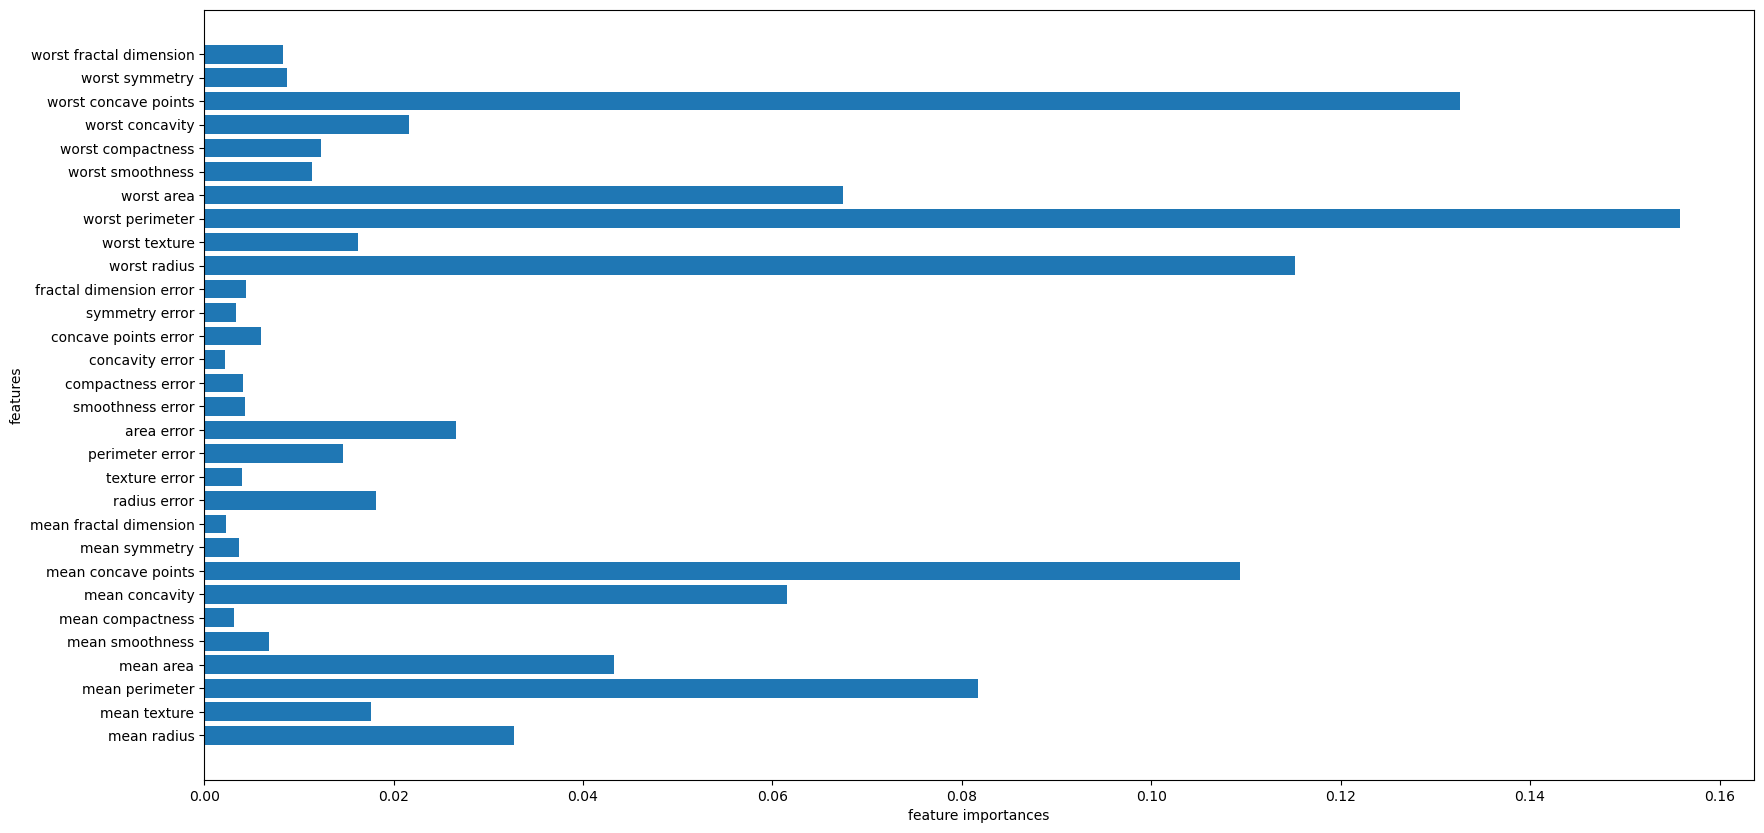

In [76]:
Random_Forest_Classifier(cancer, 5, 0.25)

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
def Decision_Tree_Classifier(dataset, max_depth, test_size):
    
    """ 훈련데이터 검증 데이터 분리 """
    X_train, X_test, Y_train, Y_test = train_test_split(
    dataset.data, dataset.target, stratify=dataset.target, test_size=test_size, random_state=42)
    
    """ 결정트리 모델 생성 및 학습 """
    dt = DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    dt.fit(X_train, Y_train)
    
    """ 훈련데이터와 데스트데이터에 대한 정확도 확인 """
    train_accuracy = dt.score(X_train, Y_train)
    test_accuracy = dt.score(X_test, Y_test)
    print("훈련데이터(train_accuracy) : {:.3f}".format(train_accuracy))
    print("테스트데이터(test_accuracy) : {:.3f}".format(test_accuracy))
    
    """ 특성 중요도 확인 feature_importances_ """
    
    features = dataset.feature_names
    importances = dt.feature_importances_
    importances_dict = {name:value for name, value in zip(features, importances)}
    print("Feature Importances : \n", importances_dict)
    
    plt.figure(figsize=(20,10))
    n_features = dataset.data.shape[1]
    plt.barh(np.arange(n_features), importances, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.savefig('dt.png',
               facecolor='#eeeeee',
               edgecolor='black',
               format='png',
               dpi=100)
    plt.show()

훈련데이터(train_accuracy) : 0.988
테스트데이터(test_accuracy) : 0.951
Feature Importances : 
 {'mean radius': 0.0, 'mean texture': 0.0, 'mean perimeter': 0.0, 'mean area': 0.0, 'mean smoothness': 0.0, 'mean compactness': 0.0, 'mean concavity': 0.0, 'mean concave points': 0.0, 'mean symmetry': 0.0, 'mean fractal dimension': 0.0, 'radius error': 0.010197368202069328, 'texture error': 0.0483982536186494, 'perimeter error': 0.0, 'area error': 0.0, 'smoothness error': 0.002415595085315826, 'compactness error': 0.0, 'concavity error': 0.0, 'concave points error': 0.0, 'symmetry error': 0.0, 'fractal dimension error': 0.0, 'worst radius': 0.7268285094603201, 'worst texture': 0.045815897088866304, 'worst perimeter': 0.0, 'worst area': 0.0, 'worst smoothness': 0.014157702104714051, 'worst compactness': 0.0, 'worst concavity': 0.0181879968644502, 'worst concave points': 0.12211319926548449, 'worst symmetry': 0.01188547831013032, 'worst fractal dimension': 0.0}


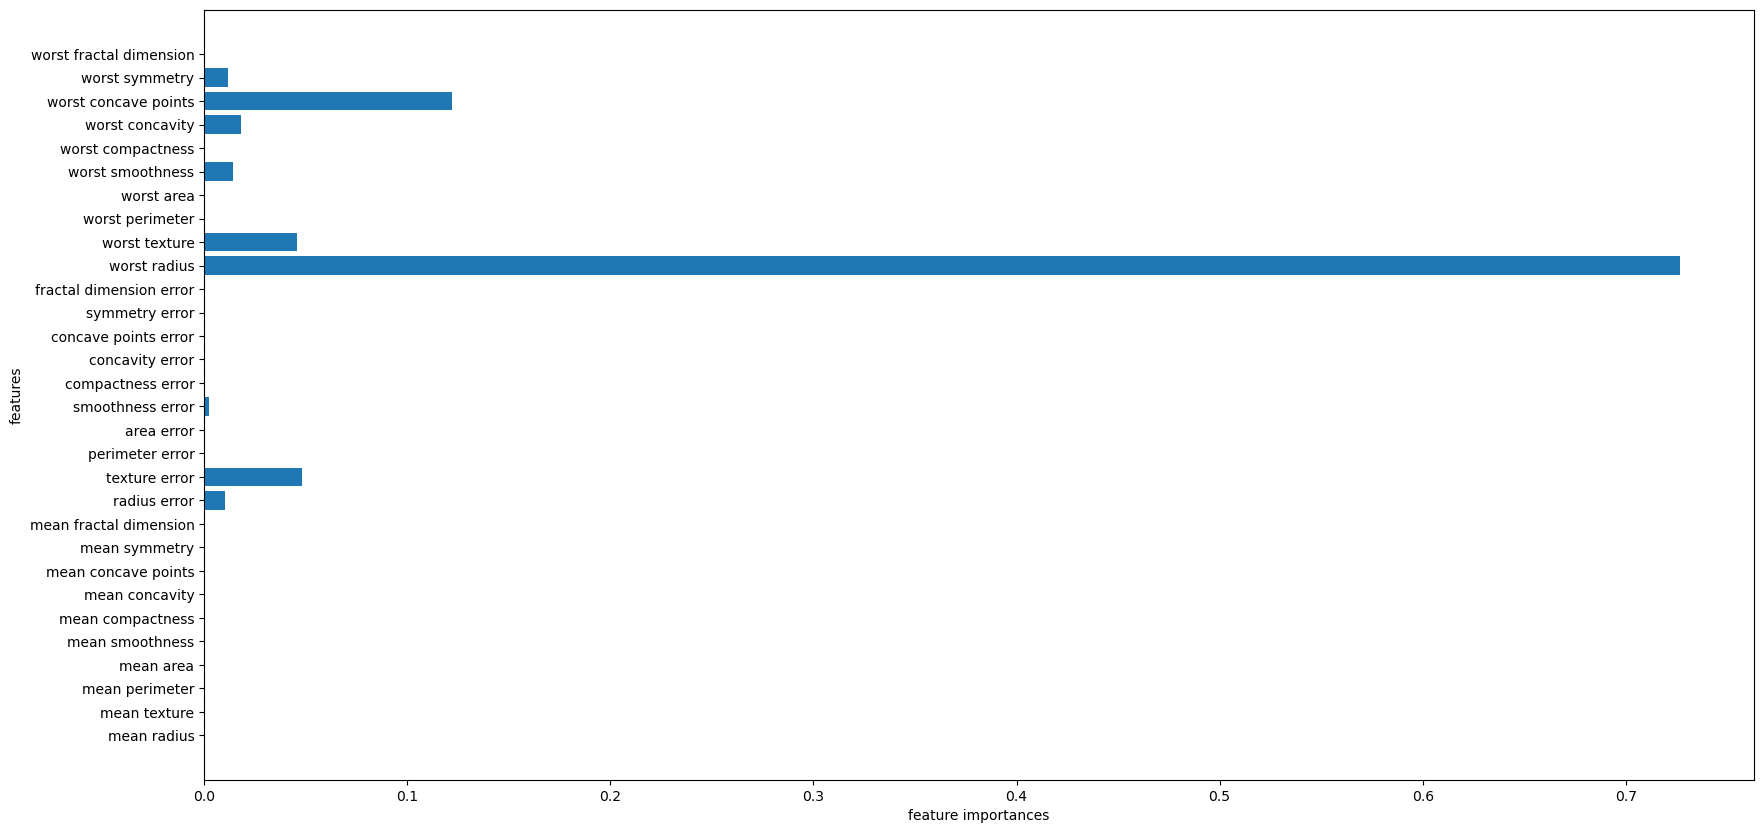

In [79]:
Decision_Tree_Classifier(cancer, 4, 0.25)